In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data (e.g., MNIST)
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_train = x_train[..., tf.newaxis]  # Add channel dimension

# **Change 1: Create dataset with labels**
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

# Build PixelCNN model
# num_classes = 256  # For grayscale images
num_classes = 10  # For MNIST digits
num_filters = 64
num_layers = 5

inputs = layers.Input(shape=(28, 28, 1))
x = inputs

# Masked convolution layers
for _ in range(num_layers):
    x = layers.Conv2D(num_filters, kernel_size=7, padding='same', activation='relu')(x)

# Change: Reshape output to match target shape
x = layers.Flatten()(x) # Flatten the output before the final layer
outputs = layers.Dense(num_classes, activation='softmax')(x) # Use Dense layer for classification
pixelcnn_model = models.Model(inputs, outputs)

# Compile the model
pixelcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
pixelcnn_model.fit(dataset, epochs=10) # **Change 2: Now the dataset includes labels**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - accuracy: 0.9098 - loss: 0.2839
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9818 - loss: 0.0595
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9877 - loss: 0.0414
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9889 - loss: 0.0342
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9927 - loss: 0.0241
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9915 - loss: 0.0253
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9929 - loss: 0.0224
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9951 - loss: 0.0170
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9953 - loss: 0.0159
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9954 - loss: 0.0151


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data (e.g., MNIST)
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_train = x_train[..., tf.newaxis]  # Add channel dimension

# Create dataset
# Include y_train for target labels
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

# Build PixelRNN model
num_classes = 10  # For MNIST digits (changed from 256)
num_units = 128

inputs = layers.Input(shape=(28, 28, 1))
# Use layers.Permute and layers.Reshape instead of tf.transpose and tf.reshape
x = layers.Permute((2, 3, 1))(inputs)  # Change to [batch_size, height, width, channels]

# Explicitly define time_steps and features without relying on input shape
time_steps = 28 * 28  # Height * Width
features = 1  # Channels

# Reshape the tensor using the calculated time_steps and features
x = layers.Reshape((time_steps, features))(x)  # Flatten to [batch_size, time_steps, features]

# LSTM Layer
lstm_out, state_h, state_c = layers.LSTM(num_units, return_sequences=True, return_state=True)(x)

# Dense output layer
# Changed to output a single class per image
outputs = layers.Dense(num_classes)(lstm_out[:, -1, :])

# # Change: Reshape the output using tf.keras.layers.Reshape to handle potential dynamic batch size
# outputs = layers.Reshape((-1, 28, 28, num_classes))(outputs)  # Reshape using -1 for batch size

pixelrnn_model = models.Model(inputs, outputs)

# Compile the model
# Use sparse_categorical_crossentropy for classification
pixelrnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
pixelrnn_model.fit(dataset, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 27ms/step - accuracy: 0.0983 - loss: 2.6523
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 26ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.0986 - loss: 2.3026
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.0986 - loss: 2.3026


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

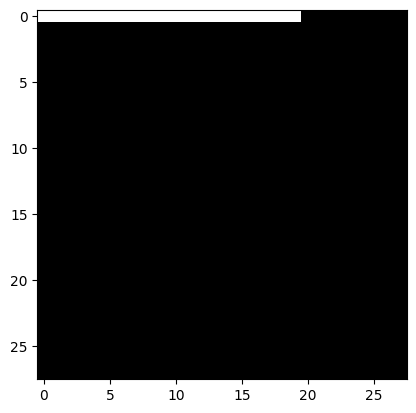

In [14]:
import numpy as np
import tensorflow as tf

def generate_pixelcnn_image(model, img_shape=(28, 28, 1)):
    # Start with a blank image (all zeros)
    generated_image = np.zeros(img_shape)

    # Sequentially generate pixels
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # Predict the value for the current pixel using the model
            logits = model.predict(generated_image[np.newaxis, ...])  # Add batch dimension

            # Change: Access logits using [0] instead of [0, i, j]
            pixel_probabilities = tf.nn.softmax(logits[0]) # Get the probabilities for all classes

            # Assuming you want the most likely class index
            predicted_class = tf.argmax(pixel_probabilities).numpy()

            # Map the predicted class to a pixel value (for grayscale, you can scale)
            generated_image[i, j, 0] = predicted_class / 9  # Scale class 0-9 to 0-1

    return generated_image

# Generate and visualize the image
generated_img = generate_pixelcnn_image(pixelcnn_model)
import matplotlib.pyplot as plt
plt.imshow(generated_img.squeeze(), cmap='gray')
plt.show()

In [15]:
def generate_pixelrnn_image(model, img_shape=(28, 28, 1)):
    # Start with a blank image (all zeros)
    generated_image = np.zeros(img_shape)

    # Sequentially generate pixels
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # Predict the value for the current pixel using the model
            logits = model.predict(generated_image[np.newaxis, ...])  # Add batch dimension
            pixel_probabilities = tf.nn.softmax(logits[0, i, j])

            # Sample a pixel value based on the predicted probabilities
            generated_image[i, j, 0] = np.random.choice(np.arange(256), p=pixel_probabilities.numpy())

    return generated_image

# Generate and visualize the image
generated_img = generate_pixelrnn_image(pixelrnn_model)
import matplotlib.pyplot as plt
plt.imshow(generated_img.squeeze(), cmap='gray')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

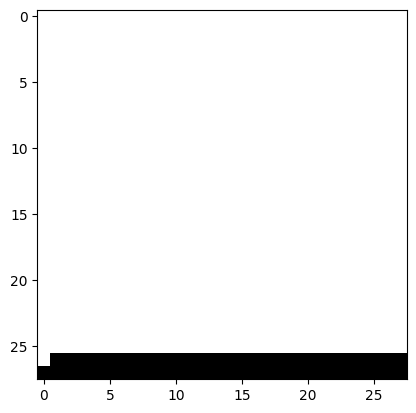

In [17]:
def generate_pixelrnn_image(model, img_shape=(28, 28, 1)):
    # Start with a blank image (all zeros)
    generated_image = np.zeros(img_shape)

    # Sequentially generate pixels
    for i in range(img_shape[0]):
        for j in range(img_shape[1]):
            # Predict the value for the current pixel using the model
            logits = model.predict(generated_image[np.newaxis, ...])  # Add batch dimension

            # Change: Access logits using [0] instead of [0, i, j]
            # logits has shape (1, num_classes) - we want the probabilities for all classes
            pixel_probabilities = tf.nn.softmax(logits[0])

            # Assuming you want the most likely class index
            predicted_class = tf.argmax(pixel_probabilities).numpy()

            # Map the predicted class to a pixel value (for grayscale, you can scale)
            # Scale class 0-9 to 0-1
            generated_image[i, j, 0] = predicted_class / 9

    return generated_image


# Generate and visualize the image
generated_img = generate_pixelrnn_image(pixelrnn_model)
import matplotlib.pyplot as plt
plt.imshow(generated_img.squeeze(), cmap='gray')
plt.show()
